# 파이썬을 이용하여 학습, 검증, 테스트 데이터 결과 확인하기

## 고강도 강 겹치기 레이저 용접부 모델링(회귀)

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import copy

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam
from keras import backend as K
from keras import metrics

from sklearn.model_selection import train_test_split

In [2]:
xy = np.loadtxt('C:/temp/data_laser_1.csv', delimiter=',', dtype=np.float32)

# 가장 마지막 2 column이 회귀, 나머지는 Input 변수
x_data = xy[:, 0:-2]
x_org = copy.deepcopy(x_data)

# Normalizing data
x_data -= x_data.mean(axis=0)
x_data /= x_data.std(axis=0)

#y_data = xy[:, [-1]]
y_data = xy[:, [-2]]

ymean = y_data.mean(axis=0)
ystd = y_data.std(axis=0)

y_data -= ymean
y_data /= ystd 

In [3]:
# split data: Training data를 70%
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, 
				       train_size=0.70, random_state=42)

# split data: Validation과 Test data를 50:50 으로
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, 
				       train_size=0.50, random_state=42)

In [4]:
model = Sequential()
# Dense(64) is a fully-connected layer with 64 hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 4-dimensional vectors.
model.add(Dense(32, activation='relu', input_dim=4))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

history=model.fit(x_data, y_data, epochs=200, batch_size=10, validation_data=(x_val, y_val))

Epoch 1/200
9/9 [==============================] - 2s 200ms/step - loss: 0.6367 - mae: 0.6405 - val_loss: 0.3277 - val_mae: 0.4800
Epoch 2/200
9/9 [==============================] - 0s 5ms/step - loss: 0.3950 - mae: 0.4996 - val_loss: 0.1922 - val_mae: 0.3799
Epoch 3/200
9/9 [==============================] - 0s 5ms/step - loss: 0.3411 - mae: 0.4506 - val_loss: 0.1364 - val_mae: 0.3114
Epoch 4/200
9/9 [==============================] - 0s 5ms/step - loss: 0.2475 - mae: 0.3871 - val_loss: 0.1187 - val_mae: 0.2903
Epoch 5/200
9/9 [==============================] - 0s 5ms/step - loss: 0.2041 - mae: 0.3365 - val_loss: 0.1062 - val_mae: 0.2653
Epoch 6/200
9/9 [==============================] - 0s 5ms/step - loss: 0.2092 - mae: 0.3299 - val_loss: 0.0878 - val_mae: 0.2369
Epoch 7/200
9/9 [==============================] - 0s 5ms/step - loss: 0.1836 - mae: 0.3274 - val_loss: 0.0730 - val_mae: 0.2205
Epoch 8/200
9/9 [==============================] - 0s 5ms/step - loss: 0.1546 - mae: 0.2923 - v

9/9 [==============================] - 0s 5ms/step - loss: 0.0983 - mae: 0.1857 - val_loss: 0.0219 - val_mae: 0.1202
Epoch 65/200
9/9 [==============================] - 0s 5ms/step - loss: 0.0494 - mae: 0.1444 - val_loss: 0.0214 - val_mae: 0.1182
Epoch 66/200
9/9 [==============================] - 0s 4ms/step - loss: 0.0622 - mae: 0.1557 - val_loss: 0.0185 - val_mae: 0.1113
Epoch 67/200
9/9 [==============================] - 0s 4ms/step - loss: 0.0601 - mae: 0.1505 - val_loss: 0.0198 - val_mae: 0.1109
Epoch 68/200
9/9 [==============================] - 0s 5ms/step - loss: 0.0681 - mae: 0.1573 - val_loss: 0.0172 - val_mae: 0.1089
Epoch 69/200
9/9 [==============================] - 0s 4ms/step - loss: 0.1129 - mae: 0.1925 - val_loss: 0.0182 - val_mae: 0.1095
Epoch 70/200
9/9 [==============================] - 0s 5ms/step - loss: 0.0865 - mae: 0.1669 - val_loss: 0.0183 - val_mae: 0.1094
Epoch 71/200
9/9 [==============================] - 0s 4ms/step - loss: 0.0847 - mae: 0.1637 - val_loss

Epoch 127/200
9/9 [==============================] - 0s 5ms/step - loss: 0.0394 - mae: 0.1076 - val_loss: 0.0076 - val_mae: 0.0600
Epoch 128/200
9/9 [==============================] - 0s 5ms/step - loss: 0.0198 - mae: 0.0868 - val_loss: 0.0065 - val_mae: 0.0576
Epoch 129/200
9/9 [==============================] - 0s 5ms/step - loss: 0.0209 - mae: 0.0918 - val_loss: 0.0061 - val_mae: 0.0545
Epoch 130/200
9/9 [==============================] - 0s 4ms/step - loss: 0.0309 - mae: 0.1023 - val_loss: 0.0072 - val_mae: 0.0556
Epoch 131/200
9/9 [==============================] - 0s 5ms/step - loss: 0.0297 - mae: 0.1019 - val_loss: 0.0075 - val_mae: 0.0605
Epoch 132/200
9/9 [==============================] - 0s 5ms/step - loss: 0.0166 - mae: 0.0721 - val_loss: 0.0059 - val_mae: 0.0560
Epoch 133/200
9/9 [==============================] - 0s 4ms/step - loss: 0.0323 - mae: 0.0984 - val_loss: 0.0062 - val_mae: 0.0522
Epoch 134/200
9/9 [==============================] - 0s 4ms/step - loss: 0.0308 - m

In [5]:
# check results
for i in range(len(x_data)):
    print(x_org[i,:], y_data[i,:]*ystd+ymean, model.predict(x_data)[i]*ystd+ymean)

[590. 590.  70.   0.] [0.82] [0.833568]
[590. 590.  60.  -5.] [0.87] [0.88792056]
[590. 590.  48. -10.] [1.02] [1.0248951]
[590. 590.  37. -15.] [1.33] [1.3485374]
[590. 590.  26. -20.] [1.99] [2.062231]
[590. 590.  20. -25.] [2.02] [2.089134]
[590. 780.  70.   0.] [0.76] [0.7450746]
[590. 780.  60.  -5.] [0.81000006] [0.82163405]
[590. 780.  48. -10.] [1.1] [1.0693772]
[590. 780.  40. -10.] [1.09] [1.095461]
[590. 780.  32. -15.] [1.41] [1.4260634]
[590. 780.  24. -20.] [2.01] [2.1528144]
[590. 980.  70.   0.] [0.74] [0.73361117]
[590. 980.  60.  -5.] [0.86] [0.87076575]
[590. 980.  48. -10.] [1.02] [1.0398057]
[590. 980.  40. -10.] [1.17] [1.1601689]
[590. 980.  32. -15.] [1.39] [1.4241203]
[590. 980.  24. -20.] [2.07] [2.0898929]
[ 590. 1180.   70.    0.] [0.81000006] [0.8350545]
[ 590. 1180.   60.   -5.] [1.04] [1.0131869]
[ 590. 1180.   48.  -10.] [1.07] [1.1024991]
[ 590. 1180.   36.  -10.] [1.21] [1.1887679]
[ 590. 1180.   32.  -15.] [1.45] [1.459892]
[ 590. 1180.   24.  -20.] [

In [6]:
# check results
for i in range(len(x_train)):
    print(x_org[i,:], y_train[i,:]*ystd+ymean, model.predict(x_train)[i]*ystd+ymean)

[590. 590.  70.   0.] [1.08] [1.062743]
[590. 590.  60.  -5.] [1.23] [1.2380189]
[590. 590.  48. -10.] [1.09] [1.095461]
[590. 590.  37. -15.] [1.24] [1.2241265]
[590. 590.  26. -20.] [2.02] [2.089134]
[590. 590.  20. -25.] [0.81000006] [0.8093306]
[590. 780.  70.   0.] [1.76] [1.7551961]
[590. 780.  60.  -5.] [1.39] [1.4241203]
[590. 780.  48. -10.] [1.13] [1.1326046]
[590. 780.  40. -10.] [1.61] [1.6572704]
[590. 780.  32. -15.] [0.81000006] [0.82163405]
[590. 780.  24. -20.] [0.86] [0.86609113]
[590. 980.  70.   0.] [1.11] [1.1046685]
[590. 980.  60.  -5.] [1.04] [1.0131869]
[590. 980.  48. -10.] [0.87] [0.8365834]
[590. 980.  40. -10.] [0.97] [0.95971715]
[590. 980.  32. -15.] [1.89] [1.8874322]
[590. 980.  24. -20.] [0.86] [0.87076575]
[ 590. 1180.   70.    0.] [0.74] [0.75343585]
[ 590. 1180.   60.   -5.] [1.33] [1.3485374]
[ 590. 1180.   48.  -10.] [2.07] [2.0898929]
[ 590. 1180.   36.  -10.] [1.07] [1.055306]
[ 590. 1180.   32.  -15.] [1.1] [1.0693772]
[ 590. 1180.   24.  -20.]

In [7]:
# check results
for i in range(len(x_val)):
    print(x_org[i,:], y_val[i,:]*ystd+ymean, model.predict(x_val)[i]*ystd+ymean)

[590. 590.  70.   0.] [0.82] [0.8340558]
[590. 590.  60.  -5.] [0.81000006] [0.8350545]
[590. 590.  48. -10.] [0.86] [0.87658787]
[590. 590.  37. -15.] [1.52] [1.5333807]
[590. 590.  26. -20.] [0.98] [0.942143]
[590. 590.  20. -25.] [1.2] [1.2017608]
[590. 780.  70.   0.] [0.87] [0.86691177]
[590. 780.  60.  -5.] [1.07] [1.041925]
[590. 780.  48. -10.] [1.12] [1.1210093]
[590. 780.  40. -10.] [1.8] [1.8181918]
[590. 780.  32. -15.] [1.36] [1.3555621]
[590. 780.  24. -20.] [0.74] [0.73361117]
[590. 980.  70.   0.] [1.11] [1.0858581]
[590. 980.  60.  -5.] [1.02] [1.0679696]


In [17]:
# check results
for i in range(len(x_test)):
    print(x_org[i,:], y_test[i,:]*ystd+ymean, model.predict(x_test)[i]*ystd+ymean)

[590. 590.  70.   0.] [1.14] [1.1284257]
[590. 590.  60.  -5.] [2.01] [2.1528144]
[590. 590.  48. -10.] [1.41] [1.4260634]
[590. 590.  37. -15.] [1.32] [1.283955]
[590. 590.  26. -20.] [2.14] [2.0198855]
[590. 590.  20. -25.] [0.92] [0.91936314]
[590. 780.  70.   0.] [1.37] [1.3560671]
[590. 780.  60.  -5.] [1.57] [1.5837206]
[590. 780.  48. -10.] [2.02] [2.0814724]
[590. 780.  40. -10.] [1.27] [1.248782]
[590. 780.  32. -15.] [1.99] [2.062231]
[590. 780.  24. -20.] [1.45] [1.459892]
[590. 980.  70.   0.] [0.82] [0.833568]
[590. 980.  60.  -5.] [1.] [0.99887073]


In [16]:
results = model.evaluate(x_test, y_test, verbose=1)
print(results)

predictions = model.predict(x_test)
print(predictions*ystd+ymean)

1/1 [==============================] - 0s 10ms/step - loss: 0.0198 - mae: 0.0931
[0.01980111561715603, 0.0930761769413948]
[[1.1284257 ]
 [2.1528144 ]
 [1.4260634 ]
 [1.283955  ]
 [2.0198855 ]
 [0.91936314]
 [1.3560671 ]
 [1.5837206 ]
 [2.0814724 ]
 [1.248782  ]
 [2.062231  ]
 [1.459892  ]
 [0.833568  ]
 [0.99887073]]


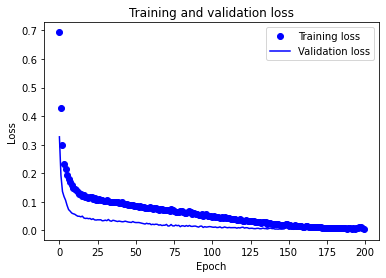

In [12]:
plt.plot(history.history['loss'], 'bo', label='Training loss')
plt.plot(history.history['val_loss'], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

## 안내
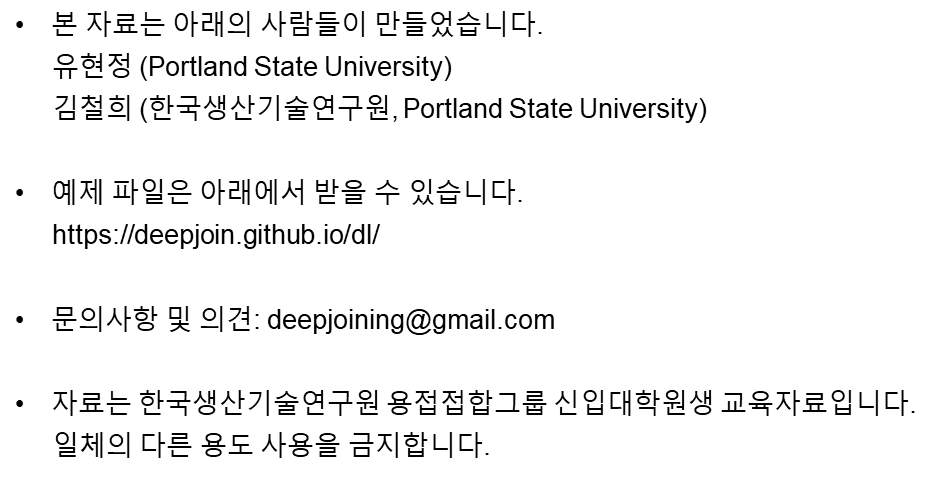

예제 파일은 아래에서 받을 수 있습니다.
     https://deepjoin.github.io/dl/

문의사항 및 의견: deepjoining@gmail.com